<a href="https://colab.research.google.com/github/lailahach/Classification-binaire-avec-un-r-seau-de-neurones/blob/main/TP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Import des bibliothèques

from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np

Distribution des classes dans le train set :
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


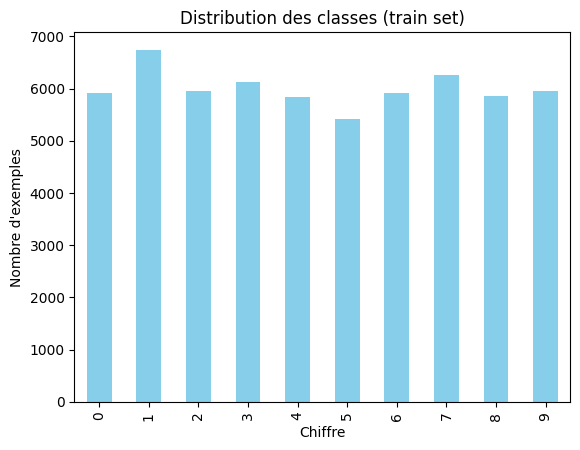

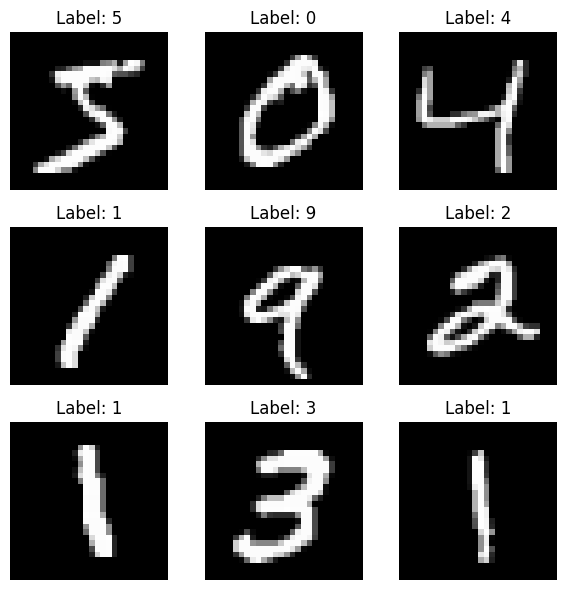

In [22]:
# Chargement des données
(x_train, y_train), (x_test, y_test) = mnist.load_data()

df = pd.DataFrame(y_train, columns=['label'])
print("Distribution des classes dans le train set :")
print(df['label'].value_counts().sort_index())

# Optionnel : afficher un graphique
df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution des classes (train set)")
plt.xlabel("Chiffre")
plt.ylabel("Nombre d'exemples")
plt.show()

# Afficher un échantillon d'images (par exemple les 9 premières)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [23]:
# Ajouter la dimension des canaux et normaliser
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

# One-hot encoding des labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Conception du modèle CNN selon les spécifications

model = Sequential()

# Conv1 : 32 filtres 5x5 + ReLU
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))

# Pool1 : MaxPooling 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv2 : 64 filtres 5x5 + ReLU
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))

# Pool2 : MaxPooling 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv3 : 64 filtres 5x5 + ReLU + padding='same' pour éviter l'erreur
model.add(Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'))

# Flatten
model.add(Flatten())

# FC4 : 100 neurones + ReLU
model.add(Dense(100, activation='relu'))

# FC5 : 10 neurones + Softmax
model.add(Dense(10, activation='softmax'))

# Résumé du modèle
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,070 (1008.09 KB)

 Trainable params: 258,070 (1008.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Entraînement
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Affichage des courbes Loss / Accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 4: Évaluation sur le set de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")




Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 183ms/step - accuracy: 0.8376 - loss: 0.5363 - val_accuracy: 0.9806 - val_loss: 0.0657
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 152ms/step - accuracy: 0.9817 - loss: 0.0574 - val_accuracy: 0.9851 - val_loss: 0.0500
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 88s 167ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9887 - val_loss: 0.0424
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 158ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9887 - val_loss: 0.0376
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.9937 - loss: 0.0183 - val_accuracy: 0.9887 - val_loss: 0.0391
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step - accuracy: 0.9958 - loss: 0.0150 - val_accuracy: 0.9900 - val_loss: 0.0367
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 147ms/step - accuracy: 0.9963 - loss: 0.0121 - val_accuracy: 0.9900 - val_loss: 0.0374
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 153ms/step - accuracy: 0.9967 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


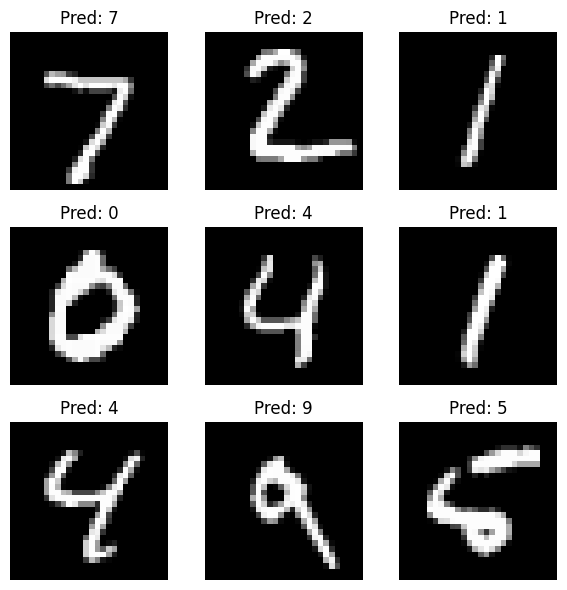

In [25]:
# Prédictions sur quelques images de test
predictions = model.predict(x_test[:9])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Exercice 2 'Pytorch'

Epoch [1/10] - Train Loss: 0.3266, Val Loss: 0.0849
Epoch [2/10] - Train Loss: 0.0747, Val Loss: 0.0508
Epoch [3/10] - Train Loss: 0.0484, Val Loss: 0.0490
Epoch [4/10] - Train Loss: 0.0379, Val Loss: 0.0408
Epoch [5/10] - Train Loss: 0.0300, Val Loss: 0.0433
Epoch [6/10] - Train Loss: 0.0243, Val Loss: 0.0421
Epoch [7/10] - Train Loss: 0.0209, Val Loss: 0.0361
Epoch [8/10] - Train Loss: 0.0176, Val Loss: 0.0379
Epoch [9/10] - Train Loss: 0.0142, Val Loss: 0.0555
Epoch [10/10] - Train Loss: 0.0137, Val Loss: 0.0285


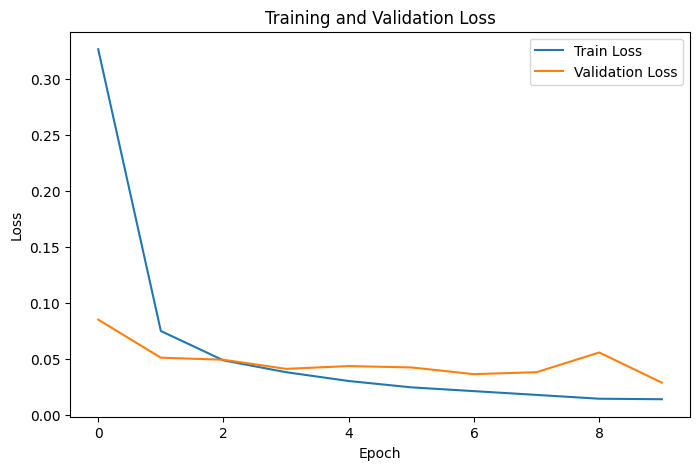

Test Accuracy: 99.15%


AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [28]:
# 🔹 Import des bibliothèques
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

# 🔹 1️⃣ Préparation des données MNIST
transform = transforms.Compose([
    transforms.ToTensor(),            # Convertir en tenseur
    transforms.Normalize((0.5,), (0.5,))  # Normalisation
])

# Télécharger les datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split train/validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# 🔹 2️⃣ Définition du modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)       # 28->24
        self.pool = nn.MaxPool2d(2,2)          # 24->12
        self.conv2 = nn.Conv2d(32, 64, 5)      # 12->8
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)  # 8->8
        self.flatten = nn.Flatten()
        # fc1 sera défini après calcul de la taille avec un dummy
        self.fc1 = None
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)  # taille finale : à vérifier
        if self.fc1 is None:
            # Définir fc1 dynamiquement
            n_features = x.numel() // x.size(0)
            self.fc1 = nn.Linear(n_features, 100).to(x.device)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Instancier le modèle et vérifier le device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

# 🔹 3️⃣ Définir l'optimizer et la loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 🔹 4️⃣ Entraînement du modèle
num_epochs = 10
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")




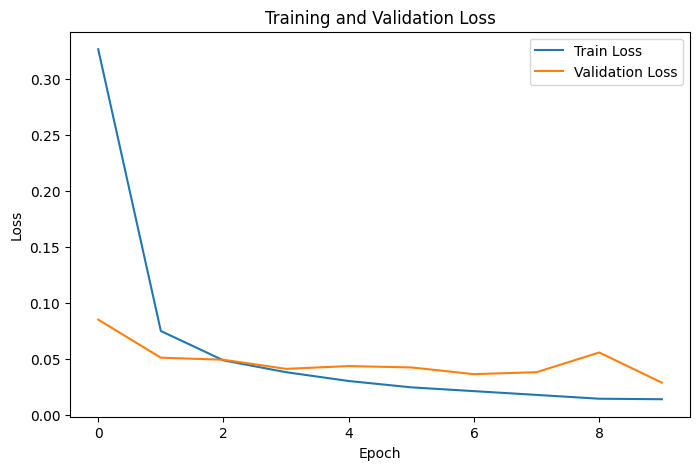

Test Accuracy: 99.15%


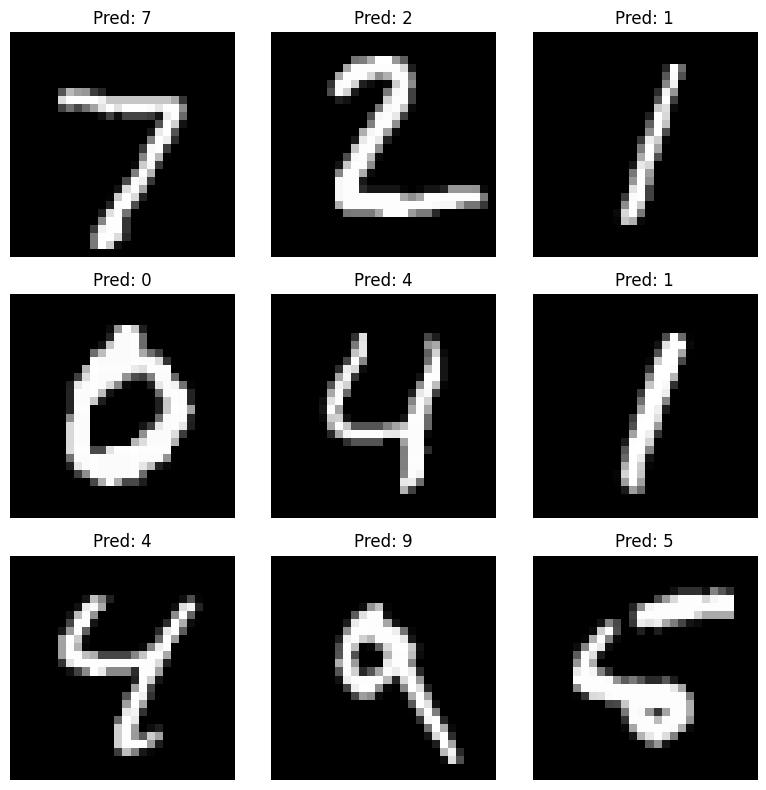

In [30]:
# 🔹 5️⃣ Affichage des courbes Loss
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 🔹 6️⃣ Évaluation sur le test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# 🔹 7️⃣ Affichage de quelques prédictions
examples = iter(test_loader)
images, labels = next(examples)  # au lieu de examples.next()
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].cpu().squeeze(), cmap='gray')
    plt.title(f"Pred: {preds[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()